In [60]:
import numpy as np
import json
import warnings
import operator

import h5py
from keras.models import model_from_json
from keras import backend as K

from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

size_title = 18
size_label = 14
n_pred = 2

base_path = "data/remote_ig/"

path_data_dict = base_path + "data_dict.txt"
path_inverted_wt = base_path + "inverted_weights.txt"
path_usage_wt = base_path + "usage_prediction.txt"
#path_class_wt = base_path + "class_weights.txt"
#path_tool_wf_freq = base_path + "tool_wf_freq.txt"

def read_file(file_path):
    with open(file_path, 'r') as data_file:
        data = json.loads(data_file.read())
    return data

#class_weights = read_file(path_class_wt)
usage_weights = read_file(path_usage_wt)
invertd_weights = read_file(path_inverted_wt)
data_dict = read_file(path_data_dict)
#tool_wf_freq = read_file(path_tool_wf_freq)

In [61]:
usage_weights

{'upload1': 9674.19822054,
 'fastqc': 5879.0,
 'deeptools_bam_coverage': 993.66842606,
 'featurecounts': 1191.25305617,
 'fastq_dump': 469.0,
 'samtools_flagstat': 295.48151577,
 'tp_tail_tool': 111.67077443,
 'multiqc': 434.45555556,
 'rna_star': 642.15365749,
 'CONVERTER_gz_to_uncompressed': 1580.10491573,
 'deeptools_bam_compare': 126.76666667,
 'trimmomatic': 2715.78047764,
 'macs2_callpeak': 576.96167968,
 'samtools_idxstats': 148.9,
 'cutadapt': 389.12786947,
 'ncbi_blastn_wrapper': 86.19920477,
 'deeptools_compute_matrix': 718.0,
 'rseqc_infer_experiment': 153.0,
 'deeptools_compute_gc_bias': 8.99518302,
 'deeptools_plot_fingerprint': 77.81428571,
 'cardinal_classification': 0.2,
 'hisat2': 489.67777778,
 'flash': 1.44449698,
 'tp_cut_tool': 268.43333333,
 'deeptools_multi_bam_summary': 79.9,
 'cardinal_preprocessing': 3.96933386,
 'cat1': 428.06632509,
 'ngsutils_bam_filter': 80.09313854,
 'datamash_ops': 100.82831132,
 'wig_to_bigWig': 274.6004776,
 'CONVERTER_interval_to_bed_

(-0.17273672461151943, 5.530536856859012e-06)


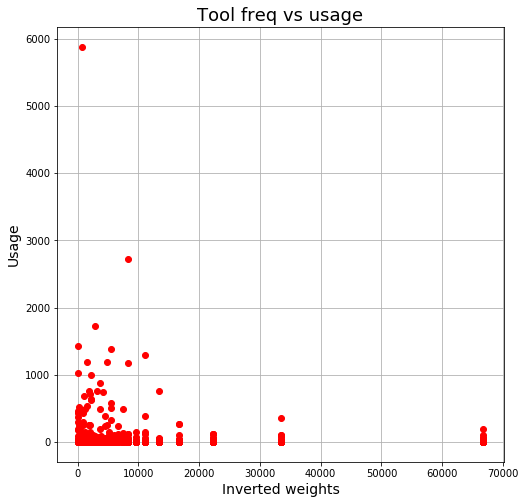

In [62]:
list_usage_values = list()
list_tool_wf_freq = list()
list_inverted_weights = list()

for tool in data_dict:
    if str(data_dict[tool]) in invertd_weights and tool in usage_weights:
        if usage_weights[tool] < 1:
            usage_weights[tool] = 1
        if invertd_weights[str(data_dict[tool])] < 1:
            invertd_weights[str(data_dict[tool])] = 1
        list_usage_values.append(usage_weights[tool])
        list_inverted_weights.append(invertd_weights[str(data_dict[tool])])

from scipy.stats import pearsonr

pearson_corr = pearsonr(list_inverted_weights, list_usage_values)
print(pearson_corr)

def plot_scatter(x_val, y_val, title, xlabel, ylabel):
    plt.figure(figsize=(8, 8))
    plt.plot(x_val, y_val, 'ro')
    plt.xlabel(xlabel, size=size_label)
    plt.ylabel(ylabel, size=size_label)
    plt.title(title, size=size_title)
    plt.grid(True)
    plt.show()

#plot_scatter(list_usage_values, list_tool_wf_freq, "Tool freq vs usage", "Usage", "Tool freq")
plot_scatter(list_inverted_weights, list_usage_values, "Tool freq vs usage", "Inverted weights", "Usage")

[4392935.606268064, 1478009.010760837, 3380318.921051563, 1681015.767950066, 1110.150424017825, 674216.9449485951, 4226.743316422763, 77068.63229421443, 179746.59084936816, 912.5431749133501, 991633.1313654463, 156887.16629587777, 4450287.026714403, 65777.62085229538, 4218134.440837798, 3607209.7838402605, 456160.02780890587, 2845971.5492614945, 2016.5317877749428, 2184.9425220130806, 5889076.510522784, 45431.265517588676, 1487.142637193057, 2471582.168877756, 9837.576771403541, 2511.229992724568, 263.50896940917454, 1110.150424017825, 250886.4221634801, 11674.936502745622, 8661906.16548869, 2824.70392066737, 3861941.2944441163, 10102.019034456222, 2381048.5102300816, 1160990.0841933067, 263.50896940917454, 2810680.2519770875, 492.455386541217, 263.50896940917454, 1301.4067708396683, 263.50896940917454, 263.50896940917454, 262472.7935290136, 1230230.3131174864, 3118519.0352348452, 1090972.7421149635, 647035.3492312343, 3107839.462315665, 2625249.088214645, 810889.696941905, 263.5089694

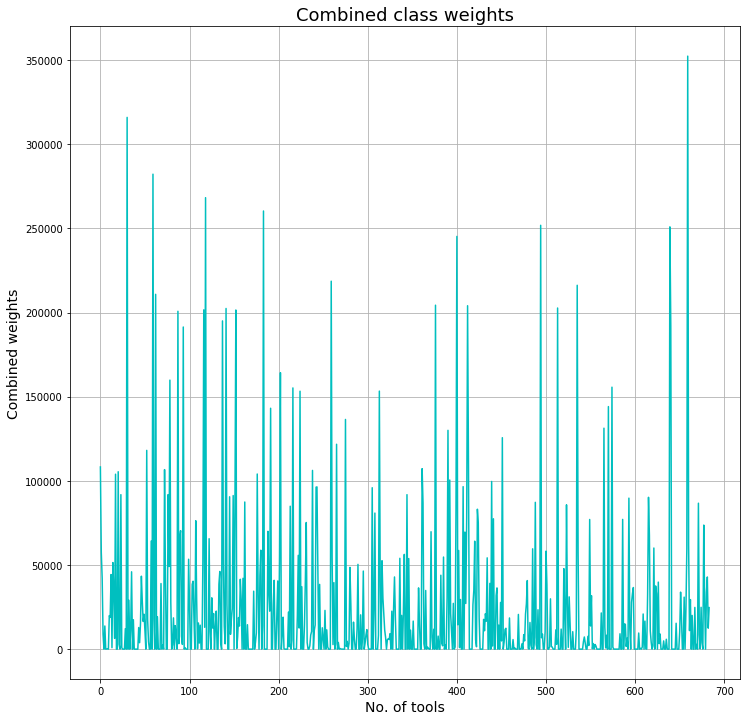

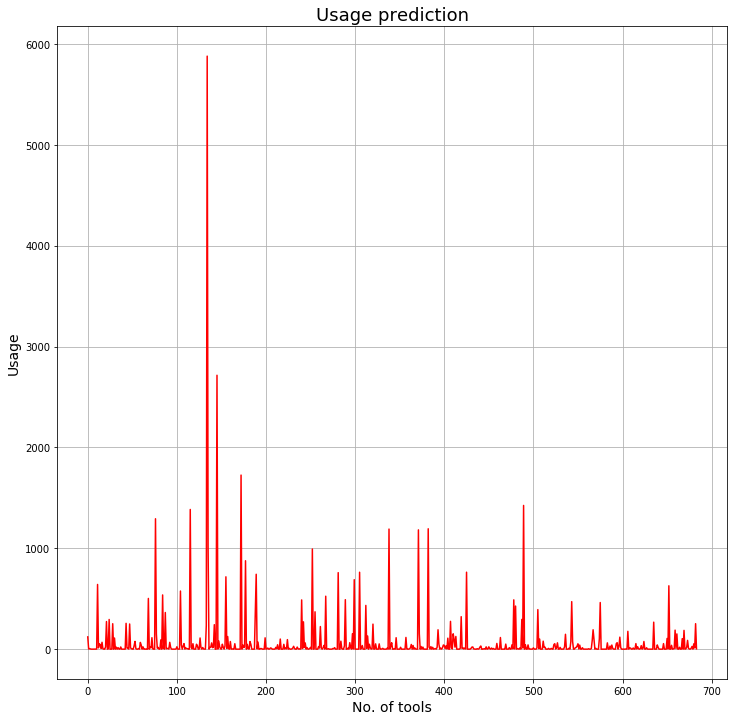

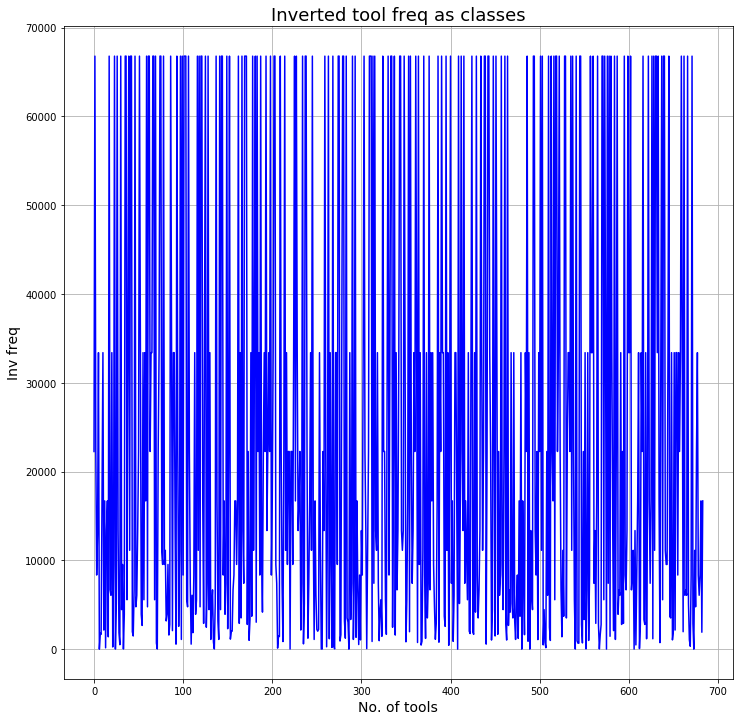

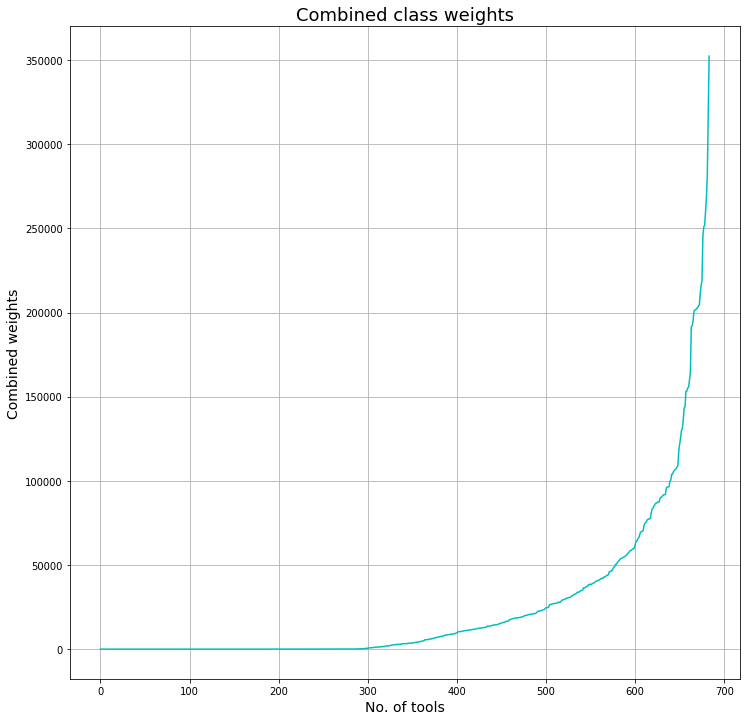

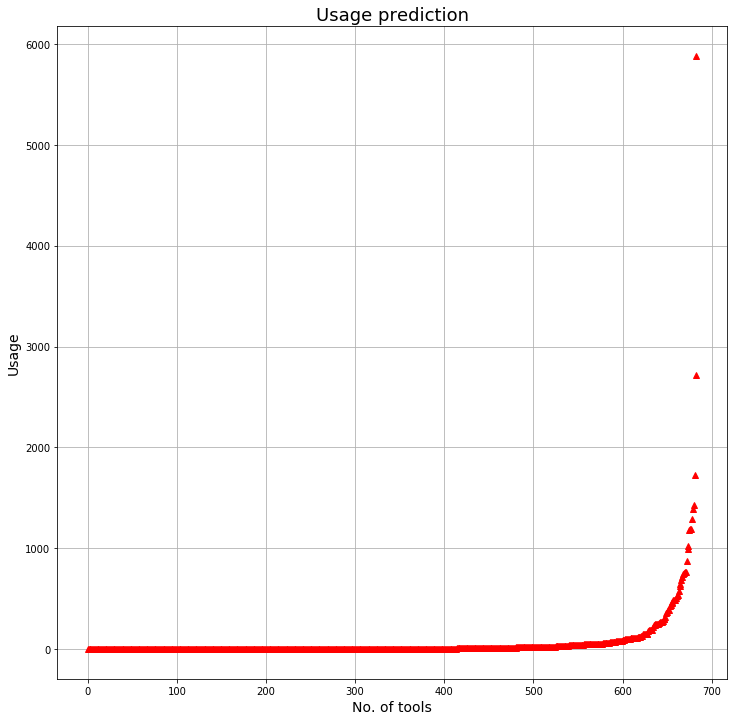

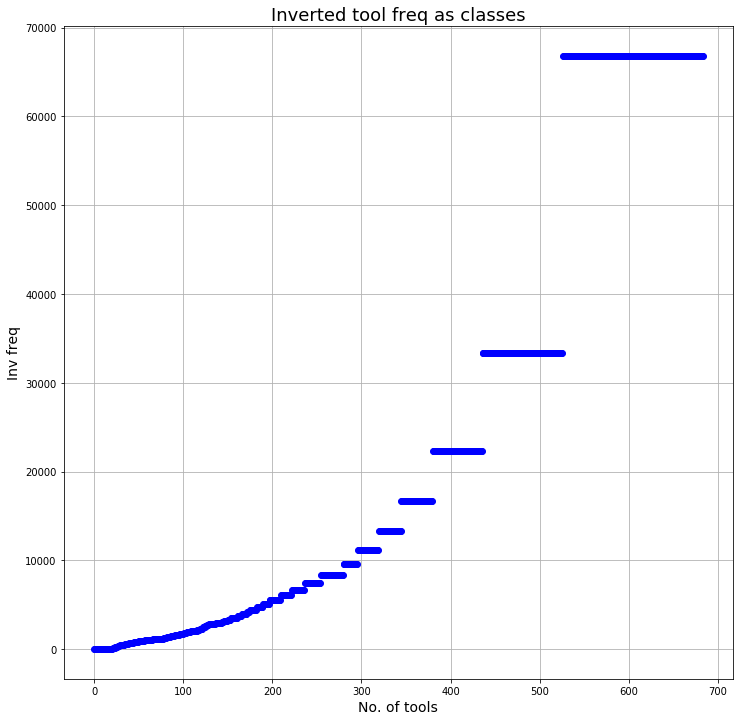

In [65]:
def plot_hist(x_val1, title, xlabel, ylabel, type_name):

    plt.figure(figsize=(12, 12))
    x_pos = np.arange(len(x_val1))
    plt.plot(x_pos, x_val1, type_name)
    plt.xlabel(xlabel, size=size_label)
    plt.ylabel(ylabel, size=size_label)
    plt.title(title, size=size_title)
    plt.grid(True)
    plt.show()
    
#list_usage_values = [val / float(np.sum(list_usage_values)) for val in list_usage_values]
#list_inverted_weights = [val / float(np.sum(list_inverted_weights)) for val in list_inverted_weights]

combined_weights = list()
combined_weights_normalized = list()

for idx, item in enumerate(list_usage_values):
    wt = (list_usage_values[idx] * np.log(list_inverted_weights[idx])) + (list_inverted_weights[idx] * np.log(list_usage_values[idx]))
    combined_weights.append(wt)

list_usage_values_n = [val / float(np.sum(list_usage_values)) for val in list_usage_values]
list_inverted_weights_n = [val / float(np.sum(list_inverted_weights)) for val in list_inverted_weights]

for idx, item in enumerate(list_usage_values_n):
    wt = -((list_usage_values_n[idx] * np.log(list_inverted_weights_n[idx])) + (list_inverted_weights_n[idx] * np.log(list_usage_values_n[idx])))
    combined_weights_normalized.append(wt)
    
factors = [a / float(b) for (a, b) in zip(combined_weights, combined_weights_normalized)]
print(factors)

plot_hist(combined_weights, "Combined class weights", "No. of tools", "Combined weights", 'c')
    
plot_hist(list_usage_values, "Usage prediction", "No. of tools", "Usage", 'r')

plot_hist(list_inverted_weights, "Inverted tool freq as classes", "No. of tools", "Inv freq", 'b')

plot_hist(sorted(combined_weights), "Combined class weights", "No. of tools", "Combined weights", 'c')
    
plot_hist(sorted(list_usage_values), "Usage prediction", "No. of tools", "Usage", 'r^')

plot_hist(sorted(list_inverted_weights), "Inverted tool freq as classes", "No. of tools", "Inv freq", 'bo')

In [56]:
combined_weights

[-0.0246440506417564,
 -0.0389571420408804,
 -0.012470905592896504,
 -0.0051962220388395005,
 -0.00855734987661211,
 -0.02041502203534469,
 -0.00031996874315241966,
 -0.0013310510674074644,
 -0.0012566961361740235,
 -0.010654936021221431,
 -0.020095039940579755,
 -0.12020359816204038,
 -0.009960010026862753,
 -0.013139505388132253,
 -0.012199947302781981,
 -0.009634425993248501,
 -0.014009600648520477,
 -0.03652468969174389,
 -0.004367299571878984,
 -0.003987056019029406,
 -0.017901828608115906,
 -0.06361783423963206,
 -0.006161798557981242,
 -0.03714266061241212,
 -0.08603930198995417,
 -0.003402489685818089,
 -0.042159413136231255,
 -0.00855734987661211,
 -0.048517064092610813,
 -0.000532682501248689,
 -0.036479317283869106,
 -0.0029742350141025715,
 -0.007523813793504223,
 -0.0002960673929276367,
 -0.004653566315573206,
 -0.03959138231009847,
 -0.042159413136231255,
 -0.00622506276615673,
 -0.021151634463830078,
 -0.042159413136231255,
 -0.007159655417486512,
 -0.042159413136231255,

In [57]:
combined_weights_normalized

[0.0246440506417564,
 0.0389571420408804,
 0.012470905592896504,
 0.0051962220388395005,
 0.00855734987661211,
 0.02041502203534469,
 0.00031996874315241966,
 0.0013310510674074644,
 0.0012566961361740235,
 0.010654936021221431,
 0.020095039940579755,
 0.12020359816204038,
 0.009960010026862753,
 0.013139505388132253,
 0.012199947302781981,
 0.009634425993248501,
 0.014009600648520477,
 0.03652468969174389,
 0.004367299571878984,
 0.003987056019029406,
 0.017901828608115906,
 0.06361783423963206,
 0.006161798557981242,
 0.03714266061241212,
 0.08603930198995417,
 0.003402489685818089,
 0.042159413136231255,
 0.00855734987661211,
 0.048517064092610813,
 0.000532682501248689,
 0.036479317283869106,
 0.0029742350141025715,
 0.007523813793504223,
 0.0002960673929276367,
 0.004653566315573206,
 0.03959138231009847,
 0.042159413136231255,
 0.00622506276615673,
 0.021151634463830078,
 0.042159413136231255,
 0.007159655417486512,
 0.042159413136231255,
 0.042159413136231255,
 0.048947906600301